<a href="https://colab.research.google.com/github/visualcomments/ru_philosophy/blob/master/philosophy_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практикум по философии


Материалы для семинарской работы - это философские тексты. Вам предлагается использовать современные инструменты для работы с текстами из области естественной обработки языка. Цель - научиться работать с философскими понятиями путем составления корректных и точных запросов.

Для работы вам предоставлена модель [fasttext](https://radimrehurek.com/gensim/models/fasttext.html), которая была обучена на 346 философских текстах на русском языке. Ваша задача - научиться формулировать 
запросы на естественном языке для того, чтобы получить нужный результат.




## 1. Загружаем данные

In [1]:
!gdown --id 1edszqEq2baT3gJ-c5zEj5gEzZ2lQ3cx5

Downloading...
From: https://drive.google.com/uc?id=1edszqEq2baT3gJ-c5zEj5gEzZ2lQ3cx5
To: /content/ft_model.zip
1.03GB [00:11, 87.2MB/s]


In [2]:
!unzip /content/ft_model.zip

Archive:  /content/ft_model.zip
replace ft_model.model? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model          
replace ft_model.model.trainables.syn1neg.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.trainables.syn1neg.npy  
replace ft_model.model.trainables.vectors_ngrams_lockf.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.trainables.vectors_ngrams_lockf.npy  
replace ft_model.model.trainables.vectors_vocab_lockf.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.trainables.vectors_vocab_lockf.npy  
replace ft_model.model.wv.vectors.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.wv.vectors.npy  
replace ft_model.model.wv.vectors_ngrams.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.wv.vectors_ngrams.npy  
replace ft_model.model.wv.vectors_vocab.npy? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ft_model.model.wv.vectors_vocab.npy 

In [3]:
from gensim.models.fasttext import FastText
import gensim

In [4]:
ft_model = FastText.load('ft_model.model')

## 2. Поиск похожих слов

Для поиска наиболее похожих слов может быть использовано одно или несколько слов. Префикс "positive=" указывает на положительные примеры для поиска:

In [5]:
ft_model.wv.most_similar(positive=["бытие"], topn=20)

[('наличное', 0.89949631690979),
 ('себебытие', 0.8982352018356323),
 ('пебытие', 0.8948809504508972),
 ('себябытие', 0.8865840435028076),
 ('небытие', 0.8855091333389282),
 ('прабытие', 0.882461428642273),
 ('самобытие', 0.8770725131034851),
 ('seynбытие', 0.8695223331451416),
 ('неабсолютное', 0.869067907333374),
 ('абсолютное', 0.8681224584579468),
 ('инобытие', 0.8632370829582214),
 ('себясущее', 0.8559380769729614),
 ('нерефлектированное', 0.8533519506454468),
 ('бытиедля', 0.8531585931777954),
 ('самосущее', 0.8437557220458984),
 ('рефлектироваиное', 0.839028537273407),
 ('рефлектированное', 0.8372132182121277),
 ('самотождественное', 0.836571455001831),
 ('сущее', 0.8358814716339111),
 ('вотбытие', 0.8337213397026062)]

Можно сравнить два слова на взаимное сходство:

In [6]:
ft_model.wv.similarity("бытие", 'время')

0.53715116

Также можно выбрать слово, которое менее всего похоже на представленные в перечне слова:


In [7]:
ft_model.wv.doesnt_match(["бытие", 'время', 'деньги'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'деньги'

Настройка поиска по положительным и отрицательным запросам дает более точный результат:

In [8]:
ft_model.wv.most_similar(positive=["деньги", 'время'], negative=['бытие'], topn=20)

[('зарабаты', 0.7386071681976318),
 ('обеды', 0.706204891204834),
 ('поденщики', 0.6989943981170654),
 ('платежу', 0.6838440895080566),
 ('батраки', 0.6816064119338989),
 ('выезды', 0.6793645620346069),
 ('билеты', 0.6780691742897034),
 ('платя', 0.6751702427864075),
 ('платежи', 0.6746121048927307),
 ('оплатят', 0.6693703532218933),
 ('платежа', 0.6659442186355591),
 ('зарабатывал', 0.6630825400352478),
 ('заработали', 0.6558319330215454),
 ('арендаторы', 0.6551381349563599),
 ('зараба', 0.6537178158760071),
 ('долги', 0.6536828279495239),
 ('откупщики', 0.6524795293807983),
 ('платят', 0.6514546275138855),
 ('отбирал', 0.6480993032455444),
 ('кредиторы', 0.6478416323661804)]

Также мы можем посмотреть на векторные представления слов в двумерной плоскости. Визуализация помогает найти семантические кластеры и оценить их сходство и различие.

In [9]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
%matplotlib inline


def tsne_plot(labels, tokens, classes, clusters):
    tsne_model = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=42)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []

    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    colors = cm.rainbow(np.linspace(0, 1, clusters))
    plt.figure(figsize=(16, 9))
    for i in range(len(x)):
        plt.scatter(x[i], y[i], c=colors[classes[i]], alpha=0.75)
        plt.annotate(labels[i], alpha=0.75, xy=(x[i], y[i]), xytext=(5, 2), 
                     textcoords='offset points', ha='right', va='bottom', size=10)
    plt.grid(True)
    plt.show()

In [10]:
labels = []
tokens = []
classes = []

samples = 3
for i, word in enumerate(["бытие", 'время', 'деньги']):
    tokens.append(ft_model.wv[word])
    labels.append(word)
    classes.append(i)
    for similar_word, similarity in ft_model.wv.most_similar(word, topn=20):
        tokens.append(ft_model.wv[similar_word])
        labels.append(similar_word)
        classes.append(i) 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

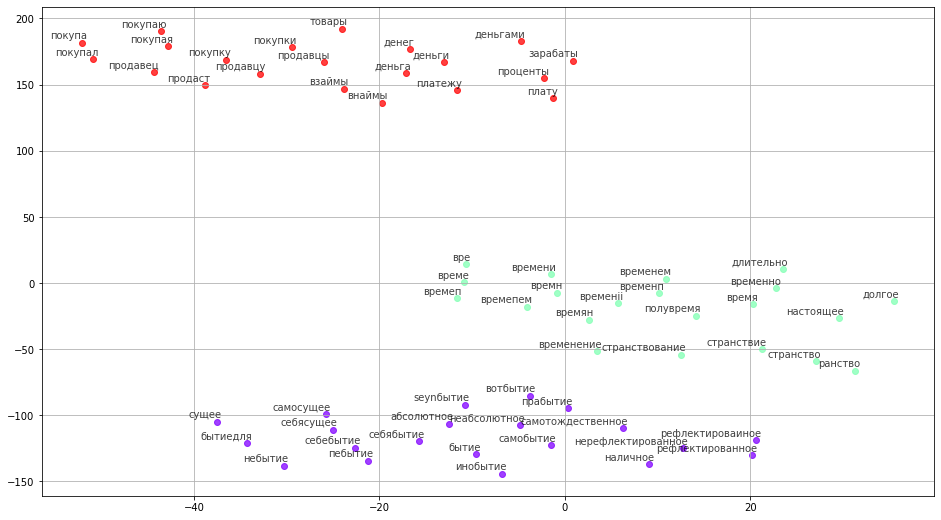

In [11]:
tsne_plot(labels, tokens, classes, samples)